<a href="https://colab.research.google.com/github/sahug/ds-tensorflow-colab/blob/master/Tensorflow%20-%20IMDB%20Sentiments%20Classification%20Using%20RNN-LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tensorflow - IMDB Sentiments Classification Using RNN-LSTM**

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.sequence import pad_sequences

In [2]:
print(tf.__version__)

2.8.0


**Load Data**

In [3]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.imdb.load_data(num_words=20000)

17473536/17464789 [==============================] - 11s 1us/step


**Apply Padding**

In [4]:
# padding any reviews which has more that 100 length
X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)

In [5]:
voacab_size = 20000
embed_size = 128

**Build LSTM**

In [7]:
from keras import Sequential
from keras.layers import LSTM, Dropout, Dense, Embedding, Activation 
# Embedding is advance version of converting words to vectors

In [9]:
model = Sequential()
model.add(Embedding(voacab_size, embed_size, input_shape=(X_train.shape[1],)))
model.add(LSTM(units=60, activation=keras.activations.tanh))
model.add(Dense(units=1, activation=keras.activations.sigmoid))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 128)          2560000   
                                                                 
 lstm_1 (LSTM)               (None, 60)                45360     
                                                                 
 dense_1 (Dense)             (None, 1)                 61        
                                                                 
Total params: 2,605,421
Trainable params: 2,605,421
Non-trainable params: 0
_________________________________________________________________


In [11]:
# model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001), 
    loss=keras.losses.BinaryCrossentropy(), 
    metrics=["accuracy"]
    )

In [12]:
history = model.fit(X_train, Y_train, epochs=5, batch_size=128, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5


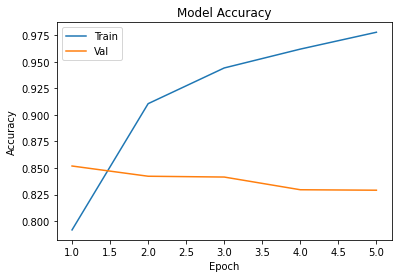

In [13]:
# Plot training and validation accuracy values
# sparse_categorical_accuracy vs val_sparse_categorical_accuracy
plt.plot(range(1, 6), history.history["accuracy"])
plt.plot(range(1, 6), history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

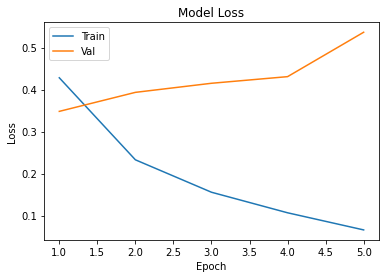

In [14]:
# Plot training and validation loss values
# Loss vs Val_Loss
plt.plot(range(1, 6), history.history["loss"])
plt.plot(range(1, 6), history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()